In [1]:
# lib
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


df = pd.read_csv("countries of the world.csv")
df.dropna(inplace = True)
# Select columns with 'object' data type, except 'Country' and 'Region'
cols_to_convert = df.select_dtypes(include=['object']).columns.drop(['Country', 'Region'])
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.str.replace(',', '.').astype(float))
df.info()

X = df.select_dtypes("number").copy()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

## Unsupervised Machine Learning: `PCA`

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


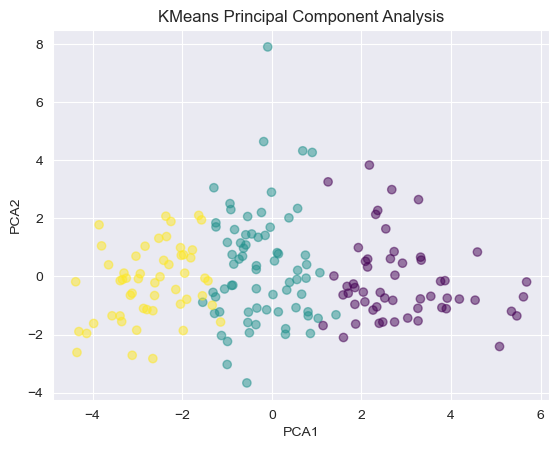

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Cluster,,,,,,,,,,,,,,,,,,
0,2.116250e+07,467563.381818,85.601818,1.015636,0.175636,83.927273,1740.000000,59.661818,16.067273,12.474727,2.729091,84.796545,1.809091,36.566364,14.575636,0.308745,0.270473,0.420964
1,5.626630e+07,739707.802817,131.626761,21.464085,-2.140141,26.925915,6339.436620,88.204225,156.587324,12.270845,7.634930,80.092676,1.971831,20.519718,6.417324,0.126761,0.336873,0.534958
2,1.821676e+07,429311.641509,730.500000,25.902453,1.987170,8.208113,20522.641509,96.681132,476.562264,17.900755,1.938302,80.160943,2.603774,12.472264,8.244717,0.039717,0.240811,0.719283


In [14]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=17)
X_pca = pca.fit_transform(X_scaled)

variance_ratio = pca.explained_variance_ratio_.cumsum()
variance_ratio

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

#not really explaining all the relationships 
cmap = plt.cm.get_cmap('plasma')
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=kmeans.labels_, cmap='viridis', alpha = 0.5,)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Principal Component Analysis')
plt.show()


# Replace cluster labels with new names
cluster_names = {0: "Undeveloped Countries", 1: "Developing Countries", 2: "Developed Countries"}
cluster_labels = [cluster_names[label] for label in kmeans.labels_]

df["Cluster Names"] = cluster_labels
df['Cluster'] = kmeans.labels_
df.groupby('Cluster').mean()

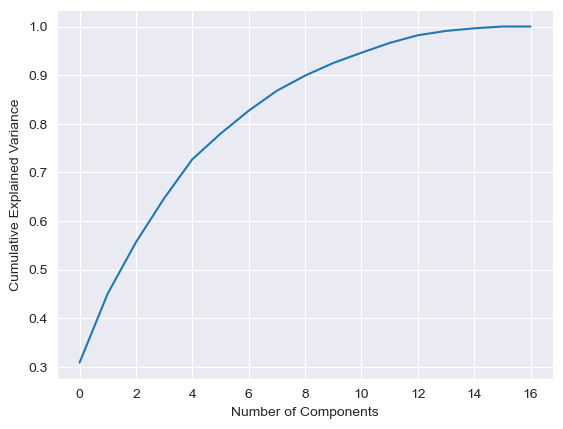

In [15]:
import numpy as np
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cumulative_variance)), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

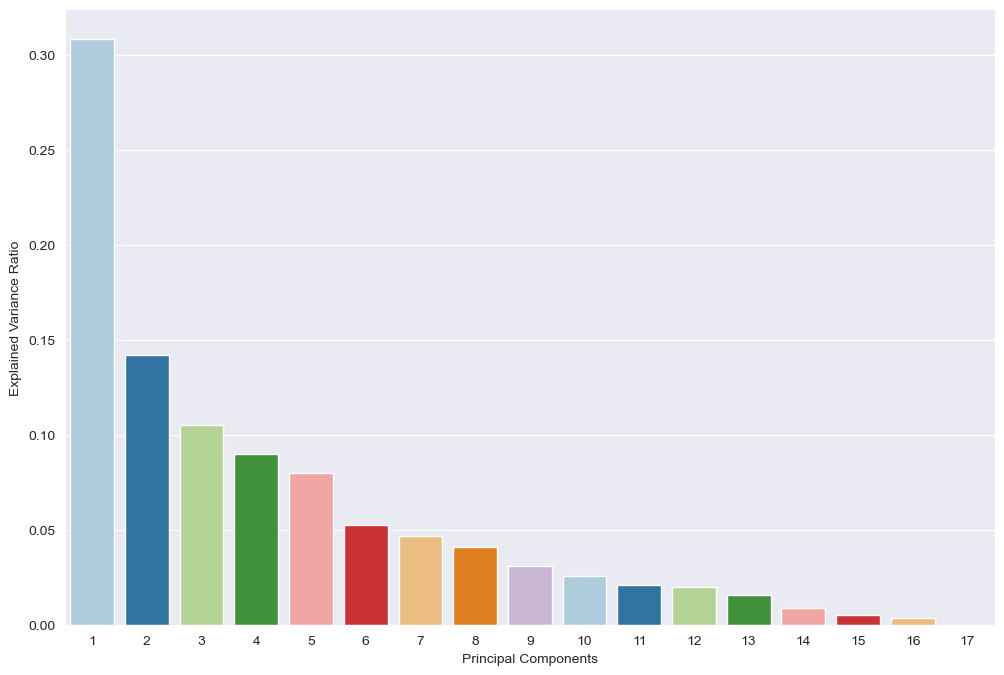

In [16]:
# viz principal components
custom_palette = sns.color_palette("Paired", 9)

plt.figure(figsize = (12,8))
index = [i for i in range(1,18)]
sns.barplot(x = index, y = pca.explained_variance_ratio_, palette = custom_palette)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

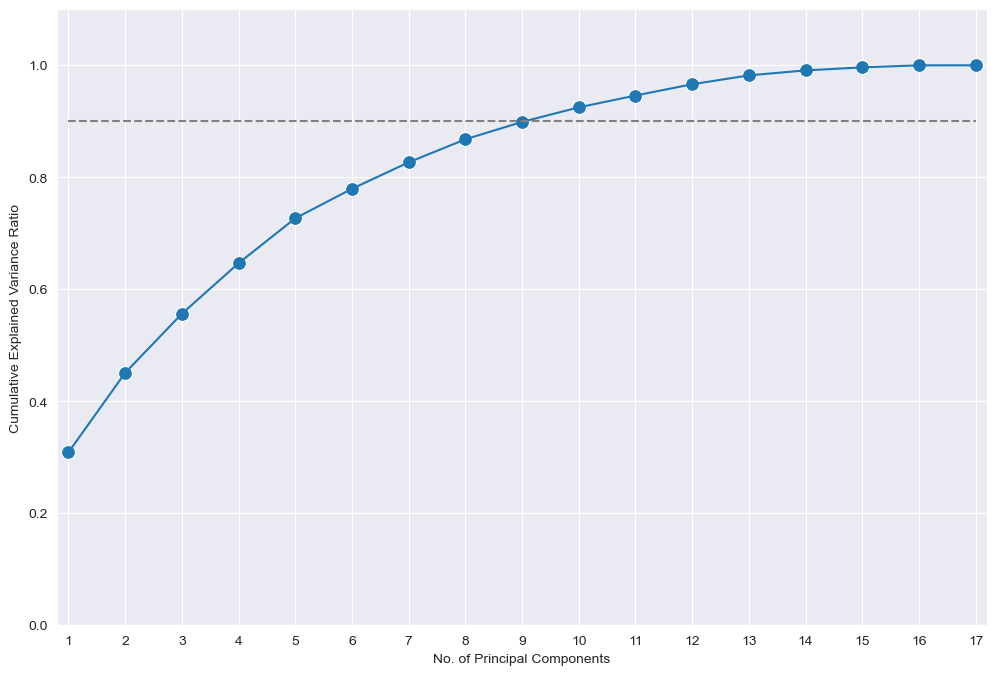

In [17]:
# viz cumulative explained variance ratio 
#at PCA, only want to get explained variance around 90%
import numpy as np
explained_variance = pca.explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('#FFFF')

sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--', colors=None)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlabel('No. of Principal Components')
plt.show() 

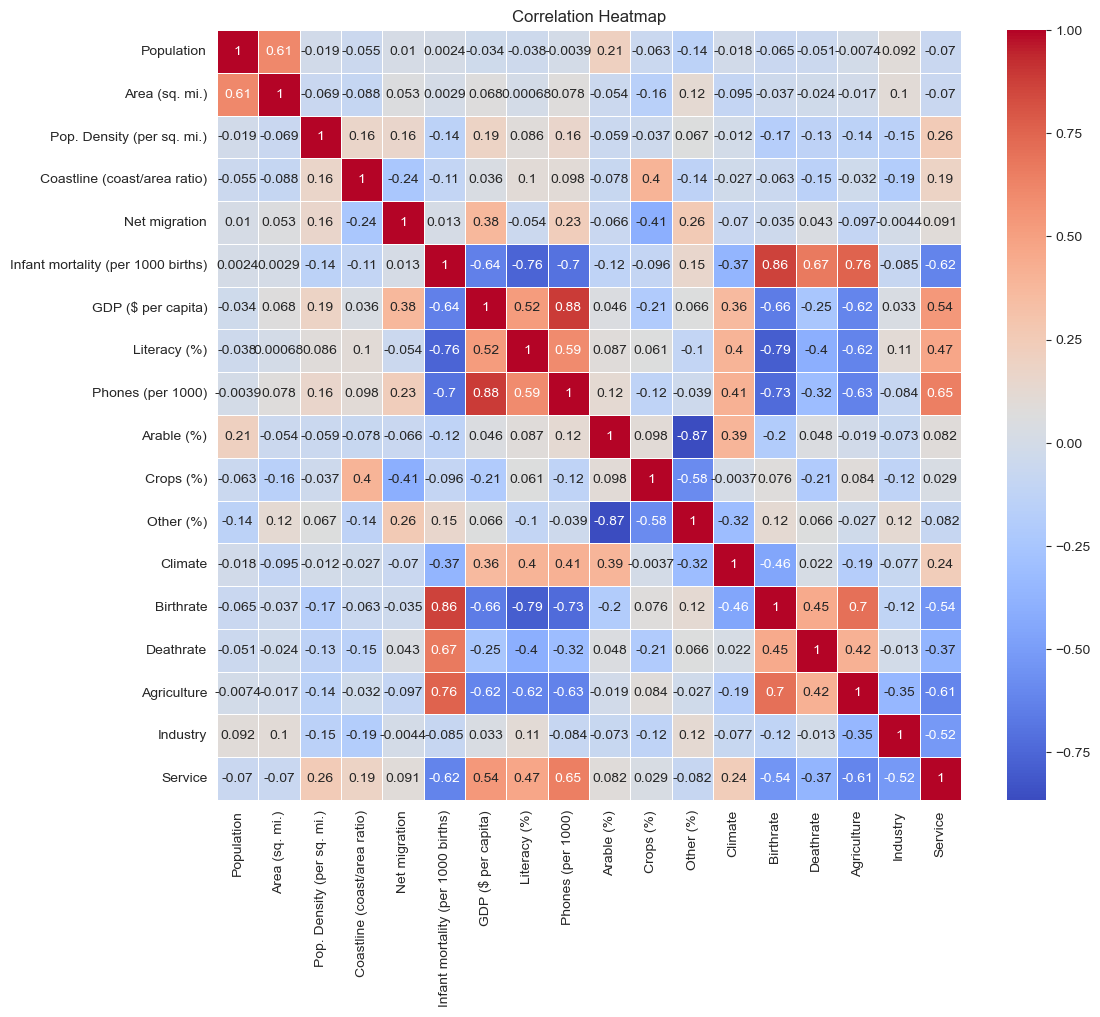

In [18]:
import seaborn as sns 
# Select the numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster Names,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,Undeveloped Countries,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,Developing Countries,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,Developing Countries,1
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,...,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,Developed Countries,2
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,...,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,Developed Countries,2


In [20]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134,208.151955,14.000447,4.440838,81.558212,2.108939,23.067486,9.465140,0.156905,0.288028,0.554508,0.988827
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537,210.121875,13.152405,8.090331,16.103748,0.697611,11.287207,5.210083,0.151343,0.140310,0.165670,0.778856
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000,0.000000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000,27.100000,3.675000,0.230000,72.825000,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500,0.000000
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000,137.100000,10.530000,1.030000,86.070000,2.000000,20.460000,7.840000,0.101000,0.274000,0.559000,1.000000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000,335.000000,20.000000,4.600000,94.810000,2.500000,32.315000,11.660000,0.233000,0.349000,0.668500,2.000000
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000,898.000000,62.110000,48.960000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000,2.000000


In [21]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Cluster Names', 'Cluster'],
      dtype='object')

## Exploratory Data Analysis 

<Figure size 640x480 with 0 Axes>

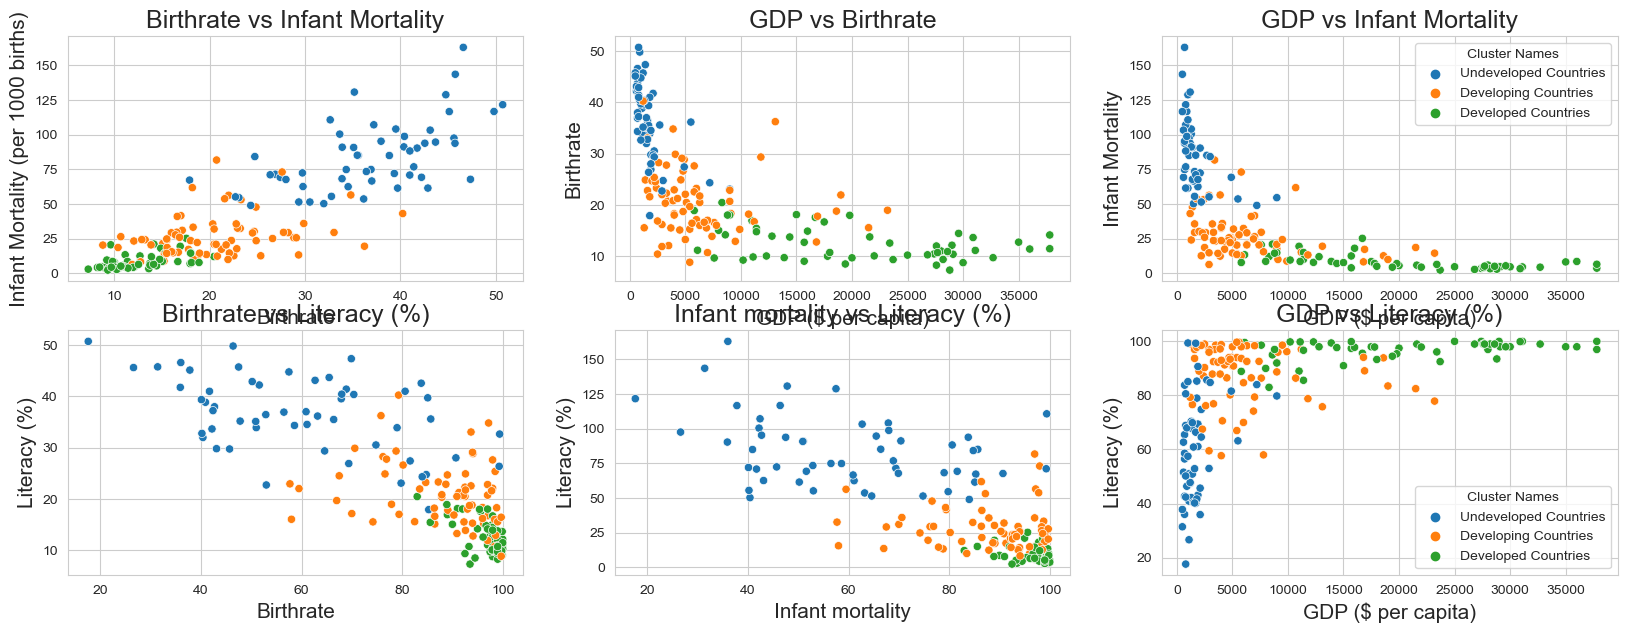

In [31]:
# create subplots with 2 rows and 3 columns
sns.set_style("whitegrid")
plt.subplots_adjust(top=1.9)

fig, [ax_1, ax_2]= plt.subplots(ncols=3, nrows = 2, figsize = (20,7))

# plot birthrate vs infant_mortality with hue=Cluster
sns.scatterplot(data=df, x='Birthrate', y='Infant mortality (per 1000 births)', hue='Cluster Names', ax=ax_1[0], legend=False)
ax_1[0].set_title('Birthrate vs Infant Mortality', fontsize=18)
ax_1[0].set_xlabel('Birthrate', fontsize=15)
ax_1[0].set_ylabel('Infant Mortality (per 1000 births)', fontsize=15)
                   
# plot GDP vs birthrate with hue=Cluster
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Birthrate', hue='Cluster Names', ax=ax_1[1], legend=False)
ax_1[1].set_title('GDP vs Birthrate', fontsize=18)
ax_1[1].set_xlabel('GDP ($ per capita)', fontsize=15)
ax_1[1].set_ylabel('Birthrate', fontsize=15)

# plot GDP vs infant_mortality with hue=Cluster
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Infant mortality (per 1000 births)', hue='Cluster Names', ax=ax_1[2])
ax_1[2].set_title('GDP vs Infant Mortality', fontsize=18)
ax_1[2].set_xlabel('GDP ($ per capita)', fontsize=15)
ax_1[2].set_ylabel('Infant Mortality', fontsize=15)


sns.scatterplot(data = df, y = "Birthrate", x = "Literacy (%)", hue = "Cluster Names", ax=ax_2[0], legend=False)
ax_2[0].set_title('Birthrate vs Literacy (%)', fontsize=18)
ax_2[0].set_xlabel('Birthrate', fontsize=15)
ax_2[0].set_ylabel('Literacy (%)', fontsize=15)

#
sns.scatterplot(data = df, y = "Infant mortality (per 1000 births)", x = "Literacy (%)", hue = "Cluster Names", ax=ax_2[1], legend=False)
ax_2[1].set_title('Infant mortality vs Literacy (%)', fontsize=18)
ax_2[1].set_xlabel('Infant mortality', fontsize=15)
ax_2[1].set_ylabel('Literacy (%)', fontsize=15)

#
sns.scatterplot(data = df, x = "GDP ($ per capita)", y = "Literacy (%)", hue = "Cluster Names", ax=ax_2[2])
ax_2[2].set_title('GDP vs Literacy (%)', fontsize=18)
ax_2[2].set_xlabel('GDP ($ per capita)', fontsize=15)
ax_2[2].set_ylabel('Literacy (%)', fontsize=15)

# show the plot
plt.tight_layout
plt.show()


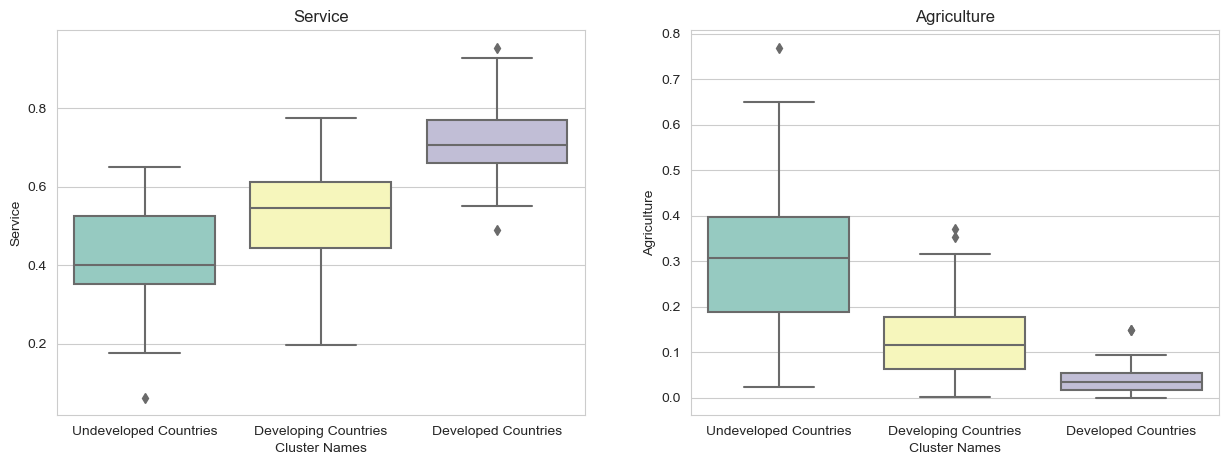

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.set_style("whitegrid")

sns.boxplot(y="Service", x="Cluster Names", data=df, ax=ax[0], palette="Set3")
ax[0].set_title('Service')

sns.boxplot(y="Agriculture", x="Cluster Names", data=df, ax=ax[1], palette="Set3")
ax[1].set_title('Agriculture')

plt.show()

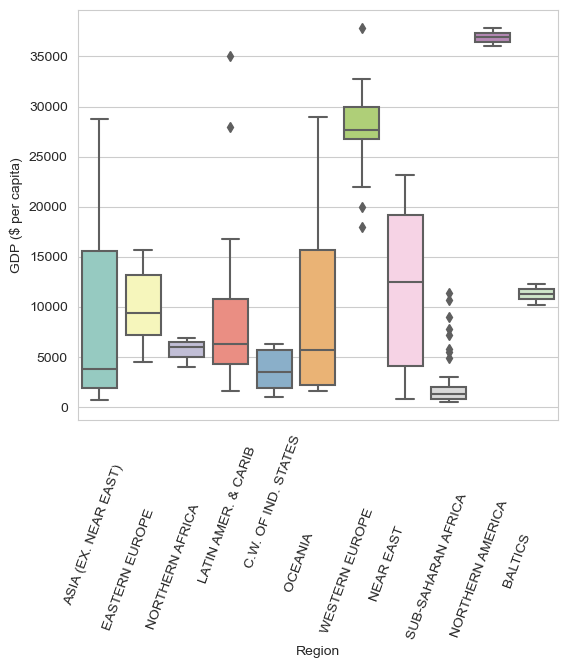

In [24]:
sns.boxplot(y=df['GDP ($ per capita)'],x= df['Region'], palette="Set3")
plt.tight_layout()
plt.xticks(rotation=70)
plt.show()

<Figure size 1000x800 with 0 Axes>

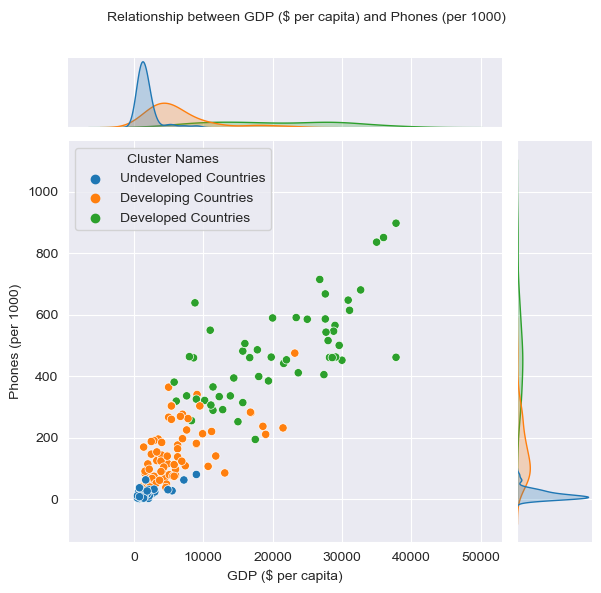

In [25]:
sns.set_style('darkgrid')

# Create jointplot
fig = plt.figure(figsize=(10, 8))
sns.jointplot(data=df, y='Phones (per 1000)', x='GDP ($ per capita)', hue = "Cluster Names")

# Set title and axis labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between GDP ($ per capita) and Phones (per 1000)', fontsize=10)
plt.xlabel('Phones per 1000', fontsize=8)
plt.ylabel('GDP per capita', fontsize=8)

# Show plot
plt.show()

In [26]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Cluster Names', 'Cluster'],
      dtype='object')

In [27]:
lit = df.sort_values("Literacy (%)",ascending=False).head(5)
lit

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster Names,Cluster
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,...,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735,Developed Countries,2
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,...,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700,Developed Countries,2
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,...,0.03,92.78,3.0,10.45,9.86,0.028,0.295,0.676,Developed Countries,2
119,Liechtenstein,WESTERN EUROPE,33987,160,212.4,0.00,4.85,4.70,25000.0,100.0,...,0.00,75.00,4.0,10.21,7.18,0.060,0.390,0.550,Developed Countries,2
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,...,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564,Developed Countries,2


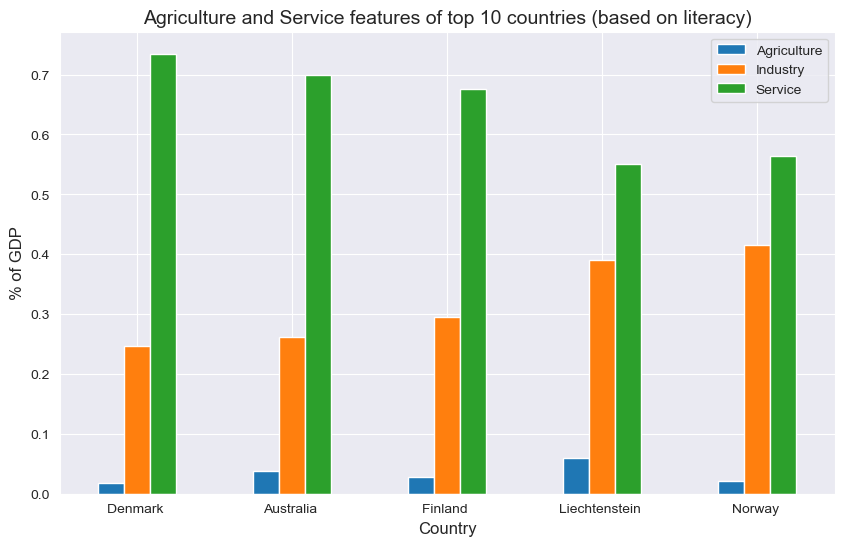

In [28]:
cols_of_interest = ['Country', 'Agriculture', 'Industry', 'Service']

# Create a new dataframe with the selected columns
df_lit = lit[cols_of_interest]

# Set the country column as index
df_lit = df_lit.set_index('Country')

# Plot a barplot of agriculture and service features for top 7 countries
ax = df_lit.plot(kind='bar', figsize=(10,6), rot=0)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("% of GDP", fontsize=12)
ax.set_title("Agriculture and Service features of top 10 countries (based on literacy)", fontsize=14)
plt.show()

In [32]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.gridspec as gridspec
fig = go.Figure()
z = dict(type='choropleth',
            locations = df.Country,
            locationmode = 'country names', z = df["Cluster"],
            text = df.Country, colorbar = {'title':'Population'},
            colorscale = 'Darkmint_R', reversescale = True)

layout = dict(title='Worldwide distribution of clusters',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [z],layout = layout)
iplot(choromap,validate=False)

fig.write_html("mapped.html")
plt.show()

In [30]:
import plotly.express as px

fig = px.scatter(df, 
                 x='GDP ($ per capita)', 
                 y='Literacy (%)', 
                 size='Population', 
                 color='Cluster', 
                 hover_name='Country',
                 log_x=True, 
                 size_max=60, 
                 title='Bubble plot of GDP, Literacy, and Population by Cluster')

fig.update_layout(xaxis_title='GDP ($ per capita)', 
                  yaxis_title='Literacy (%)', 
                  legend_title='Cluster')
fig.write_html("bubbleplot.html")
fig.show()